# Iran Population
## First try
### 99/09/18 and 25 and 99/10/09

Householdsize distribution in Iran.
What is the only child effect?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Household size for irannian families and a poisson distribution fitted on it.
Data is for 1395 and number of families in household size 1, 2, ..., 9, 10 and more than it.

Text(0.5, 1.0, 'Distribution of families in household size\n Iran 1395')

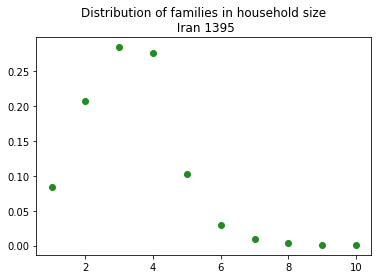

In [4]:
household_size = [2046774, 5008251, 6881169, 6683614, 2467888, 725926, 234751, 84080, 31090, 21590]

plt.plot(np.arange(1, 11, 1), household_size/np.sum(household_size), 'o', c = 'forestgreen')

plt.title("Distribution of families in household size\n Iran 1395")

Fitting a poisson distribution to Iran household size data. Note that $k=0$ is removed from the scope adding a normalization coefficient.

λ = [2.61244454]


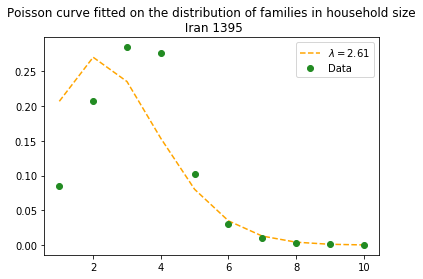

In [22]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)/(1-np.exp(-lamb))


k = np.arange(1, 11, 1) #family size

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, k, household_size)

print('\u03BB =', parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    k,
    fit_function(k, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\lambda = {np.round(parameters[0], 2)}$'
)

plt.plot(
    k,
    household_size/np.sum(household_size),
    'o', c = 'forestgreen', label = 'Data'
)

plt.title(f"Poisson curve fitted on the distribution of families in household size\n Iran 1395")

plt.legend()
# plt.savefig(f"IranHouseholdSize.png")
plt.show()

It is probable we should see household size for couples to see the "only child" effect.
How can we have a better poisson fit?

### Trying to understand the only child effect

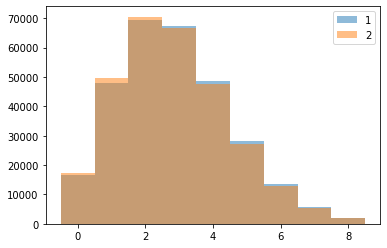

In [81]:
lam = 2.9

hhs = 0
hhs2 = np.append(np.random.poisson(lam, 150000), np.random.poisson(lam-0.1, 150000))
hhs1 = np.random.poisson(lam, 300000)
bins = np.arange(10)-0.5
plt.hist(hhs1, alpha = 0.5, bins = bins, label = '1')
plt.hist(hhs2, alpha = 0.5, bins = bins, label = '2')
plt.legend()

(array([7.4750e+03, 1.0215e+04, 7.2840e+03, 3.3300e+03, 1.2310e+03,
        3.5300e+02, 8.3000e+01, 2.1000e+01, 6.0000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

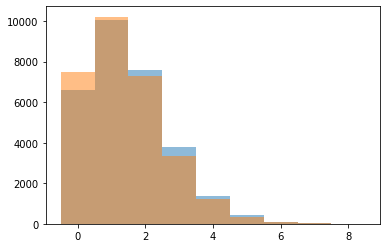

In [80]:
lam = 1.5

hhs = 0
hhs2 = np.append(np.random.poisson(lam, 15000), np.random.poisson(lam-0.2, 15000))
hhs1 = np.random.poisson(lam, 30000)
bins = np.arange(10)-0.5
plt.hist(hhs1, alpha = 0.5, bins = bins)
plt.hist(hhs2, alpha = 0.5, bins = bins)

(array([1752., 4701., 7096., 6640., 4835., 2780., 1305.,  598.,  198.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

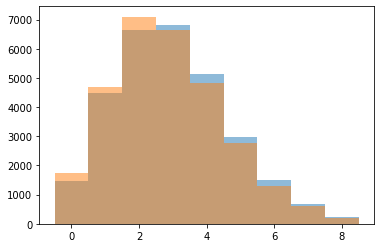

In [140]:
lam = 3

hhs = 0
hhs2 = np.append(np.append(np.random.poisson(lam, 10000), np.random.poisson(lam-0.2, 10000)), np.random.poisson(lam-0.2, 10000))
hhs1 = np.random.poisson(lam, 30000)
bins = np.arange(10)-0.5
plt.hist(hhs1, alpha = 0.5, bins = bins)
plt.hist(hhs2, alpha = 0.5, bins = bins)

[ 0  1  2  3  4  5  6  7  8  9 10 11] [0.09786744 0.20739369 0.23702668 0.19521597 0.12934908 0.07262105
 0.0357051  0.01555037 0.00615187 0.0021928  0.00092595]
λ = [2.47450126]


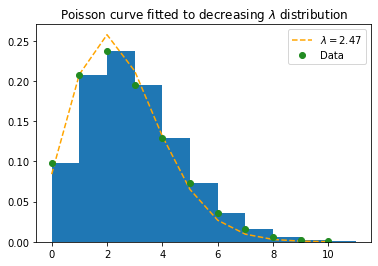

In [44]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


k = np.arange(0, 12) #family size

enteries, bins, patches = plt.hist(hhs2,bins = k , density=True)
print(bins, enteries)
size = np.size(k)
# enteries = enteries[0:size+1]

k = k[0:size-1]
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, k, enteries)

print('\u03BB =', parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    k,
    fit_function(k, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\lambda = {np.round(parameters[0], 2)}$'
)

plt.plot(
    k,
    enteries,
    'o', c = 'forestgreen', label = 'Data'
)

plt.title("Poisson curve fitted to decreasing $\lambda$ distribution")

plt.legend()


[ 2.48559186e-03 -4.55341708e-03  4.01129310e-03 -2.19267591e-03
  8.14780856e-06 -2.87413402e-04 -1.17889268e-03  1.52605602e-03
 -3.56697326e-05  2.07019096e-04  2.20118515e-04]


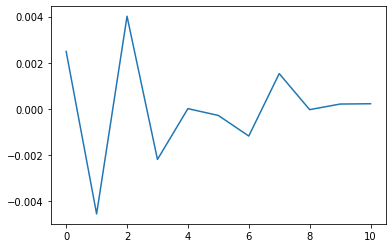

In [143]:
print(enteries - fit_function(k, *parameters))

plt.plot(k[0:size-1], enteries - fit_function(k, *parameters))

[ 0  1  2  3  4  5  6  7  8  9 10 11] [0.05389367 0.15356663 0.22105207 0.21869176 0.16348792 0.09964962
 0.05207677 0.02347305 0.00938789 0.00333377 0.00138685]
λ = [2.97966681]


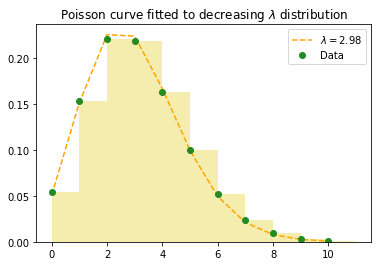

In [45]:
lam = 3

hhs2 = np.append(np.append(np.random.poisson(lam-0.5, 100000), np.random.poisson(lam, 100000)), np.random.poisson(lam+0.5, 100000))


k = np.arange(0, 12) #family size

enteries, bins, patches = plt.hist(hhs2,bins = k , density=True, color = 'khaki', alpha = 0.7)
print(bins, enteries)
size = np.size(k)
# enteries = enteries[0:size+1]

k = k[0:size-1]
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, k, enteries)

print('\u03BB =', parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    k,
    fit_function(k, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\lambda = {np.round(parameters[0], 2)}$'
)

plt.plot(
    k,
    enteries,
    'o', c = 'forestgreen', label = 'Data'
)

plt.title("Poisson curve fitted to decreasing $\lambda$ distribution")

plt.legend()

# plt.savefig("oce.png")

[ 0.00308391  0.00217047 -0.00450298 -0.00533454 -0.00339301  0.00019971
  0.00268883  0.00245025  0.00155777  0.00074142  0.00061441]


Text(0.5, 1.0, 'Error of the fitted poisson curve and data')

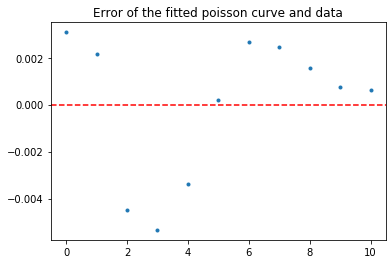

In [46]:
print(enteries - fit_function(k, *parameters))

plt.plot(k[0:size-1], enteries - fit_function(k, *parameters), '.')
plt.axhline(y = 0, c = 'r', linestyle = '--')
plt.title("Error of the fitted poisson curve and data")
# plt.savefig("oce_error.png")

[ -5.  -10.   -7.5   0.    5.6   6.7]
[ -8.2 -12.3  -5.1   4.3   8.    6.7]
[-13.5 -13.5   0.    9.    9.    5.4]
[-22.3 -11.2   8.4  12.6   7.8   3.3]


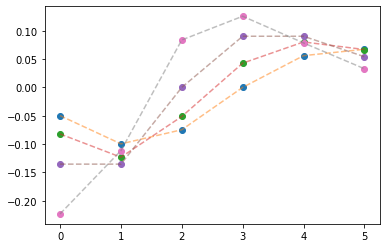

In [163]:
for lam in [3, 2.5, 2, 1.5]:
    dp = []
    for k in range(6):
        dp.append(poisson.pmf(k, lam) * (k/lam-1))
    print(np.round(dp, 3) * 100)
    plt.plot(np.arange(6), dp, 'o')
    plt.plot(np.arange(6), dp, '--', alpha = 0.5)

Let decrease $\lambda$ over time to see what happens for child numbers distribution. We can see the only child effect for slow decrease in $\lambda$. The underestimation will occur in fitted value of $\lambda$.

[ 0  1  2  3  4  5  6  7  8  9 10 11] [3.55693125e-01 3.67226500e-01 1.90062875e-01 6.58146250e-02
 1.69706250e-02 3.51462500e-03 6.17875000e-04 8.75000000e-05
 1.12500000e-05 8.75000000e-07 1.25000000e-07]
λ = [1.03400392]


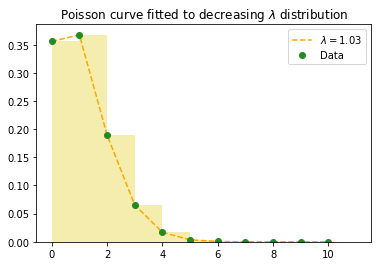

In [64]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


hhs2 = []
lam  = 1
for i in range(8):
    hhs2 = np.append(hhs2, np.random.poisson(lam, 1000000))
    lam += 0.01

k = np.arange(0, 12) #family size

enteries, bins, patches = plt.hist(hhs2,bins = k , density=True, color = 'khaki', alpha = 0.7)
print(bins, enteries)
size = np.size(k)
# enteries = enteries[0:size+1]

k = k[0:size-1]
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, k, enteries)

print('\u03BB =', parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    k,
    fit_function(k, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\lambda = {np.round(parameters[0], 2)}$'
)

plt.plot(
    k,
    enteries,
    'o', c = 'forestgreen', label = 'Data'
)

plt.title("Poisson curve fitted to decreasing $\lambda$ distribution")

plt.legend()

# plt.savefig("oce.png")

[ 1.12732557e-04 -4.45018319e-04 -2.40199130e-05  2.97760412e-04
  3.44513594e-05  1.22110259e-05  1.42900391e-05 -1.65845905e-06
 -2.73774478e-07 -4.48958660e-07 -1.18978439e-08]


Text(0.5, 1.0, 'Error of the fitted poisson curve and data')

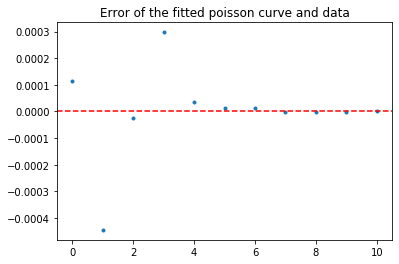

In [65]:
print(enteries - fit_function(k, *parameters))

plt.plot(k[0:size-1], enteries - fit_function(k, *parameters), '.')
plt.axhline(y = 0, c = 'r', linestyle = '--')
plt.title("Error of the fitted poisson curve and data")
# plt.savefig("oce_error.png")

### Sex ratio
Sex ratio is the ratio of male to female population and in our assumptions it is constant along time. In reality male infants are more commun and also it is more probable to die early for him. Overall this is the sex ratio it has been assumed for adault population.
For Iran's data we have the ratio for years 1365, 1375, 1385, 1390, 1395 as 105, 103, 104, 102, 103. it is has defined as:

$\frac{M}{F} \times 100$

In [24]:
sex_ratio = 103/203 #1395 vlue for Iran

#population in range 20 to 49 years old in Iran 1395
n_f = 20022365
n_m = 20561588

We are counting couples assuming every single person is going to join with a person of the opposite sex if there exist any. Moreover it is assumed that they marry once and with one person.

In [31]:
#calculating female and male population 
#using poisson distribution and for a given female and male population for an aritrary sex ratio 
def next_gen(n_f, n_m, sex_ratio, lam):
    n_couples = np.min([n_f, n_m])
    #new generation
    n_f = 0
    n_m = 0
    for i in range(n_couples):
        inf_num = np.random.poisson(lam, 1)
        for j in range(int(inf_num)):
            if random.random() > sex_ratio:
                n_f = n_f + 1
            else:
                n_m = n_m + 1
    
    return n_f, n_m 

In [34]:
%%time

x = 2
time = np.arange(x)
lam_mat = [3] #np.arange(1.8, 2.5, 0.1)

color = ['khaki','orange', 'red', 'brown', 'forestgreen', 'blue', 'black', 'gray']

for lam in lam_mat:
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    ave = 5
    pop_1run  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            pop_1run[i, 0], pop_1run[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, lam)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(pop_1run[:, 0]), np.mean(pop_1run[:, 1])
    
    index = int(np.where(np.isclose(lam_mat, lam))[0])
    plt.plot(-pop[:, 0], time, c = color[index], label = f'$\lambda = {np.round(lam, 2)}$') #female
    plt.plot( pop[:, 1], time, c = color[index])   #male

plt.legend()

KeyboardInterrupt: 

In [86]:
lam_mat = np.arange(1.8, 2.5, 0.1)
print(lam_mat)
print(int(np.where(np.isclose(lam_mat, 1.9))[0]))

[1.8 1.9 2.  2.1 2.2 2.3 2.4]
1


In [30]:
%%time
lam = 3
np.random.poisson(lam, int(1e8))

Wall time: 16.3 s


array([1, 2, 1, ..., 4, 7, 2])